# Tutorial 


In [37]:
from skimage import io, filters, color

import matplotlib.pyplot as plt
import numpy  as np 
import scipy.ndimage as nd

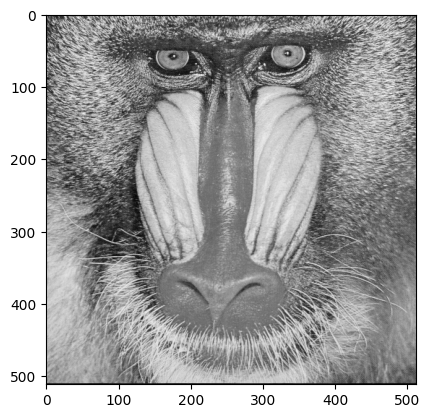

In [38]:
# read the image 
img_path = "images/baboon.png"
img = plt.imread(img_path)

# apply min-max normalization 
img = color.rgb2gray(img)
img = (img - img.min()) / (img.max() - img.min())

plt.imshow(img, cmap='gray')
plt.show()

## 1. Introduction 

### Blur: blur the image using Point Spread Function (PSF), in our case it is Gaussian filter 

### Noise: additive Gaussian noise 

Text(0.5, 1.0, 'Blurry + Noisy image')

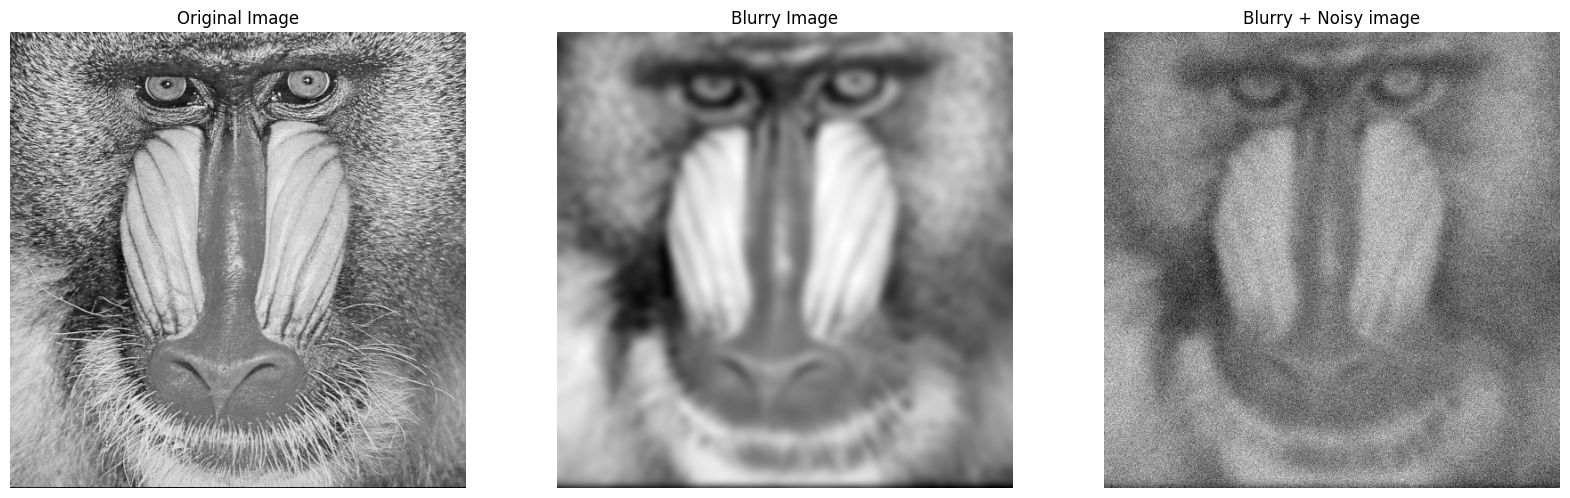

In [43]:
# apply Gaussian filter to the image
img_blurry = filters.gaussian(img, sigma=5)
img_blurry_noisy = img_blurry + np.random.normal(0., 0.1, img.shape)

# display the original, blury, blurry - noisy image
fig, axes = plt.subplots(1, 3, figsize=(20, 10))

axes[0].imshow(img, cmap='gray')
axes[0].axis('off')
axes[0].set_title('Original Image')

axes[1].imshow(img_blurry, cmap='gray')
axes[1].axis('off')
axes[1].set_title(f'Blurry Image')

axes[2].imshow(img_blurry_noisy, cmap='gray')
axes[2].axis('off')
axes[2].set_title(f'Blurry + Noisy image')

# Convolution  


Text(0.5, 1.0, 'Filtered Image')

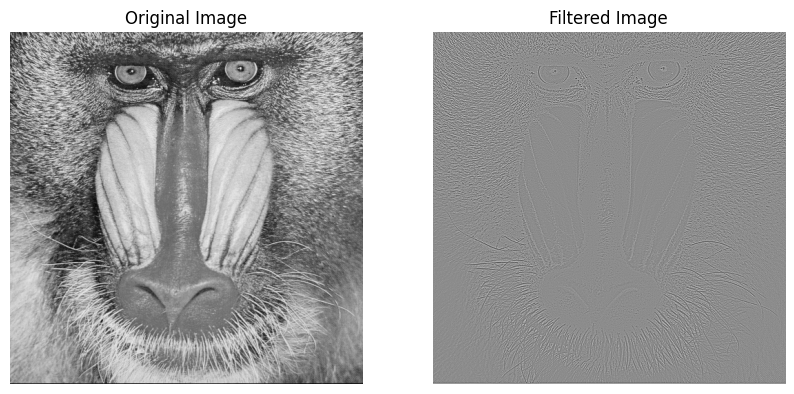

In [121]:
# Laplacian kernel 
kernel = np.array([[0,  1, 0],
                   [1, -4, 1],
                   [0,  1, 0]])

img_edge = nd.convolve(img, kernel)

# Display the original and Laplacian edge-detected images side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(img, cmap='gray')
axes[0].axis('off')
axes[0].set_title('Original Image')

axes[1].imshow(img_edge, cmap='gray')
axes[1].axis('off')
axes[1].set_title('Filtered Image')

# Convolution Theorem

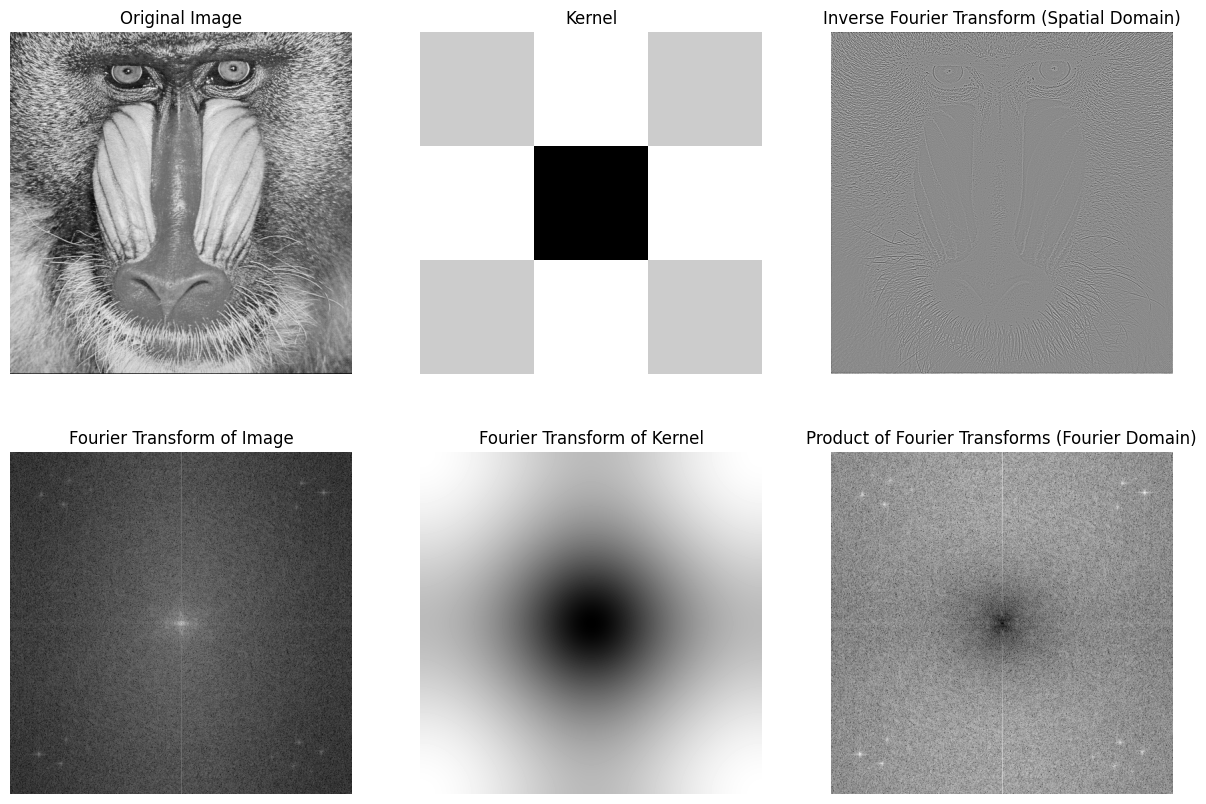

In [122]:
import numpy as np
import matplotlib.pyplot as plt

# Laplacian kernel 
kernel = np.array([[0,  1, 0],
                   [1, -4, 1],
                   [0,  1, 0]])

h, w = img.shape
kh, kw = kernel.shape 

# Fourier transform of the image
img_ft = np.fft.fft2(img)
img_ft = np.fft.fftshift(img_ft)

# Fourier transform of the zero-padded kernel
kernel_pad = np.zeros_like(img, dtype="float64")
kernel_pad[h//2-kh//2:h//2+kh//2+1, w//2-kw//2:w//2+kw//2+1] = kernel

kernel_ft = np.fft.fft2(kernel_pad)
kernel_ft = np.fft.fftshift(kernel_ft)

# Filter the image in Fourier Space 
img_filtered_ft = kernel_ft * img_ft
img_filtered = np.fft.ifft2(np.fft.fftshift(img_filtered_ft))
img_filtered = np.fft.fftshift(img_filtered).real 

# Display images 
fig, axes = plt.subplots(2, 3, figsize=(15,10))

axes[0, 0].imshow(img, cmap='gray')
axes[0, 0].axis('off')
axes[0, 0].set_title('Original Image')

axes[0, 1].imshow(kernel, cmap='gray')
axes[0, 1].axis('off')
axes[0, 1].set_title('Kernel')

axes[0, 2].imshow(img_filtered.real, cmap='gray')
axes[0, 2].axis('off')
axes[0, 2].set_title('Inverse Fourier Transform (Spatial Domain)')

axes[1, 0].imshow(np.log(1 + np.abs(img_ft)), cmap='gray')
axes[1, 0].axis('off')
axes[1, 0].set_title('Fourier Transform of Image')

axes[1, 1].imshow(np.log(1 + np.abs(kernel_ft)), cmap='gray')
axes[1, 1].axis('off')
axes[1, 1].set_title('Fourier Transform of Kernel')

axes[1, 2].imshow(np.log(1 + np.abs(img_ft * kernel_ft)), cmap='gray')
axes[1, 2].axis('off')
axes[1, 2].set_title('Product of Fourier Transforms (Fourier Domain)')

plt.show()

## 2. Deconvolution solution with inverse PSF

### 2.1. Deconvolution for blurry image 

### 2.2. Deconvolution for blurry & noisy image 


## 3. 1-D matrix-vector representation

### 3.1. Define transformation matrix from 1D PSF

#### 3.2. Examples with end conditions as in figure 1.4.2




## 4. 2-D matrix vector representation

### 4.1. Lexicographic ordering

### 4.2. Define transformation matrix from 2D PSF

### 4.3. Examples with end conditions as in figure 1.4.3

## 5. Matrix inverse solution

### 5.1. Solve 1D examples from part 3

### 5.2. Solve 2D examples from part 4

## 6. Sparsity models 

### 6.1. Synthesis formulations (generative models)

### 6.1.1. DCT for synthesis model

### 6.1.2. Iterative hard thresholding for sparsity constraint

### 6.2. Synthesis formulations: regularized

### 6.3. Analysis formulations (discriminative models)

### 6.3.1. Wavelet transform for analysis model